In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score,explained_variance_score, max_error

In [ ]:
path ='drive/MyDrive/data/clean/'

In [ ]:
df = pd.read_csv(path+'2018.csv')
print('Dimension of dataset= ', df.shape)
df.tail() 

Dimension of dataset=  (7094201, 17)


,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,DEP_DELAY,WEATHER_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,ARR_DELAY,CRS_DEP_TIME,DEP_TIME,CRS_ARR_TIME,ARR_TIME,OP_CARRIER_INDEXED,ORIGIN_INDEXED,DEST_INDEXED
7094196,2018-12-31,AA,1815,DCA,CLT,-4.0,0.0,0.0,0.0,-5.0,15:34:00,15:30:00,17:14:00,17:09:00,2.0,17.0,4.0
7094197,2018-12-31,AA,1816,CLT,DFW,6.0,0.0,0.0,0.0,1.0,17:51:00,17:57:00,19:52:00,19:53:00,2.0,4.0,2.0
7094198,2018-12-31,AA,1817,CLT,MEM,-5.0,0.0,0.0,0.0,11.0,20:15:00,20:10:00,21:07:00,21:18:00,2.0,4.0,61.0
7094199,2018-12-31,AA,1818,CLT,RDU,23.0,0.0,0.0,0.0,14.0,13:00:00,13:23:00,13:50:00,14:04:00,2.0,4.0,33.0
7094200,2018-12-31,AA,1818,RDU,CLT,8.0,0.0,0.0,0.0,-4.0,14:35:00,14:43:00,15:46:00,15:42:00,2.0,33.0,4.0


2. Baseline Regression with only DEP_DELAY

In [ ]:
df = df.fillna({'DEP_DELAY': '0.0'})
df = df.fillna({'ARR_DELAY': '0.0'})

In [ ]:
def dep_carrier(df):
    df_X = pd.DataFrame().assign(DEP_DELAY = df['DEP_DELAY'],OP_CARRIER_INDEXED=df['OP_CARRIER_INDEXED'])
    X = df_X.values

    df_y = pd.DataFrame(df['ARR_DELAY'])
    y = df_y.values

    model_r = make_pipeline(StandardScaler(with_mean=True), linear_model.SGDRegressor(loss ="squared_error"))
    #model_r = linear_model.Ridge(normalize= True, alpha= 35)
    model_r.fit(X,y.ravel())
    y_pred = model_r.predict(X)

    rmse = np.sqrt(mean_squared_error(y,y_pred))
    r2 = r2_score(y,y_pred)
    return model_r,rmse,r2,y_pred,y


In [ ]:
def dep_delay(df):
    #X = pd.DataFrame(df['DEP_DELAY'], df['WEATHER_DELAY'], df['CARRIER_DELAY'], df['LATE_AIRCRAFT_DELAY'])
    df_X = pd.DataFrame().assign(DEP_DELAY = df['DEP_DELAY'])
    X = df_X.values

    df_y = pd.DataFrame(df['ARR_DELAY'])
    y = df_y.values

    model_r = make_pipeline(StandardScaler(with_mean=True), linear_model.SGDRegressor(loss ="squared_error"))
    #model_r = linear_model.Ridge(normalize= True, alpha= 35)
    model_r.fit(X,y.ravel())
    y_pred = model_r.predict(X)

    rmse = np.sqrt(mean_squared_error(y,y_pred))
    r2 = r2_score(y,y_pred)
    return model_r,rmse,r2,y_pred,y

In [ ]:
def dep_org_dest_carrier_delay(df):
    #X = pd.DataFrame(df['DEP_DELAY'], df['WEATHER_DELAY'], df['CARRIER_DELAY'], df['LATE_AIRCRAFT_DELAY'])
    df_X = pd.DataFrame().assign(DEP_DELAY = df['DEP_DELAY'],ORIGIN_INDEXED = df['ORIGIN_INDEXED'],DEST_INDEXED = df['DEST_INDEXED'],OP_CARRIER_INDEXED=df['OP_CARRIER_INDEXED'])
    X = df_X.values

    df_y = pd.DataFrame(df['ARR_DELAY'])
    y = df_y.values

    model_r = make_pipeline(StandardScaler(with_mean=True), linear_model.SGDRegressor(loss ="squared_error"))
    #model_r = linear_model.Ridge(normalize= True, alpha= 35)
    model_r.fit(X,y.ravel())
    y_pred = model_r.predict(X)

    rmse = np.sqrt(mean_squared_error(y,y_pred))
    r2 = r2_score(y,y_pred)
    return model_r,rmse,r2,y_pred,y

In [ ]:
def print_info(model,rmse,r2,y_pred,y,i):

  print('RMSE from Model',i,' is ',rmse)
  print('R^2  from Model',i,' is ',r2)
  print("\n")
  plt.scatter(y[100:100000], y_pred[100:100000])
  plot([150,360],[260,50],'k-')
  plt.xlabel('Arrival Delay From Dataset')
  plt.ylabel('Arrival Delay Predicted By Model')
  plt.rcParams["figure.figsize"] = (10,6) # Custom figure size in inches
  plt.title("Arrival Delay From Dataset Vs Arrival Delay Predicted By Model")

Baseline model using only ['DEP_DELAY'] - model 1

In [ ]:
model1,rmse,r2,y_pred,y = dep_delay(df)

RMSE from Model 1  is  13.884207805983861
R^2  from Model 1  is  0.9122430440154659


A flight with DEP_DELAY=120 predicted ARR_DELAY = 115.30649855915969 minutes


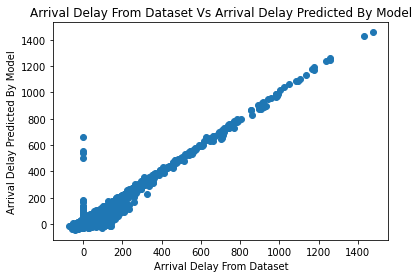

In [ ]:
print_info(model1,rmse,r2,y_pred,y,1)
ip =[[120]]
pred = model1.predict(ip)
print('A flight with DEP_DELAY=120 predicted ARR_DELAY =', pred[0] , "minutes")

Baseline model using only ['DEP_DELAY' and 'LATE_AIRCRAFT_DELAY'] - model 2

In [ ]:
model2,rmse,r2,y_pred,y = dep_carrier(df)

RMSE from Model 2  is  13.845342555054676
R^2  from Model 2  is  0.9127336622029245


A flight with DEP_DELAY=120, LATE_AIRCRAFT_DELAY=15 predicted ARR_DELAY = 118.32234858019456 minutes


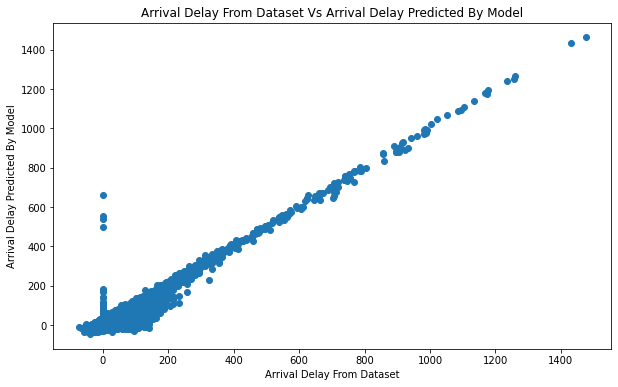

In [ ]:
print_info(model2,rmse,r2,y_pred,y,2)
ip =[[120,15]]
pred = model2.predict(ip)
print('A flight with DEP_DELAY=120, LATE_AIRCRAFT_DELAY=15 predicted ARR_DELAY =', pred[0] , "minutes")

Baseline model using only ['DEP_DELAY', 'WEATHER_DELAY'and 'LATE_AIRCRAFT_DELAY'] - model 3

In [ ]:
model3,rmse,r2,y_pred,y = dep_org_dest_carrier_delay(df)

RMSE from Model 3  is  13.836172337720281
R^2  from Model 3  is  0.9128492225459446


A flight with DEP_DELAY=120 with given Carrier, Origin and Destination 121.90926179453253 minutes


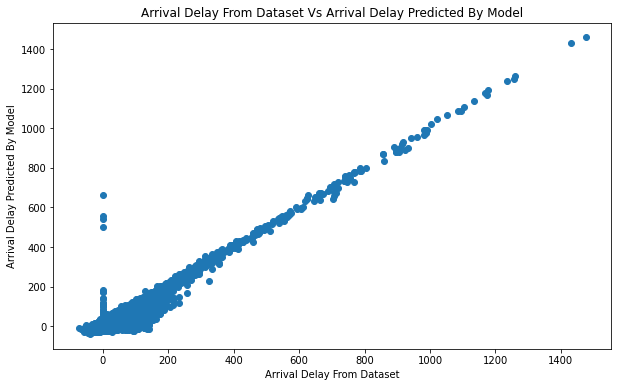

In [ ]:
print_info(model3,rmse,r2,y_pred,y,3)
ip =[[120,15,4,33]]
pred = model3.predict(ip)
print('A flight with DEP_DELAY=120 with given Carrier, Origin and Destination', pred[0] , "minutes")